In [21]:
import pandas as pd
import numpy as np

### LOAD DATA, DICTIONARY, COHERNECE SCORES, LISTS

In [22]:
df_1 = pd.read_csv('data/articles1.csv')
df_1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Health Care Suit - The New York Times,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have a new fear when it comes to their health care lawsuit against the Obama administration: They might win. The incoming Trump administration could ch...
1,1,17284,Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood dries and the votive candles burn out, people peer down from windows and see crime scenes gone cold: a band of yellow police tape blowing in the br..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106 - The New York Times",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, critics praised its spare, haunting visual style, vastly different from anything Disney had done before. But what they did not know was that the film’s s..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Music - The New York Times",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t necessarily evenhanded. Of all the fields of endeavor that suffered mortal losses in 2016 — consider Muhammad Ali and Arnold Palmer in sports and ..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile - The New York Times,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, Kim said on Sunday that his country was making final preparations to conduct its first test of an intercontinental ballistic missile — a bold sta..."


In [10]:
import pickle 

with open("lists/bow_corpus.txt", "rb") as fp:   # Unpickling
    bow_corpus = pickle.load(fp)
    
with open("lists/norm_corpus_bigrams.txt", "rb") as fp:   # Unpickling
    norm_corpus_bigrams = pickle.load(fp)
    
with open("lists/norm_papers.txt", "rb") as fp:   # Unpickling
    norm_papers = pickle.load(fp)
    
with open("lists/pre_papers.txt", "rb") as fp:   # Unpickling
    pre_papers = pickle.load(fp)
    
with open("lists/pre_titles.txt", "rb") as fp:   # Unpickling
    pre_titles = pickle.load(fp)

In [23]:
import nltk
import gensim

dictionary = gensim.corpora.Dictionary.load('models/dictionary.gensim')
coherence_df = pd.read_csv('models/mallet_scores/coherence_df.csv')

with open("models/mallet_scores/coherence_scores.txt", "rb") as fp:   # Unpickling
    coherence_scores = pickle.load(fp)


### Visualizing coherence scores of LDA models

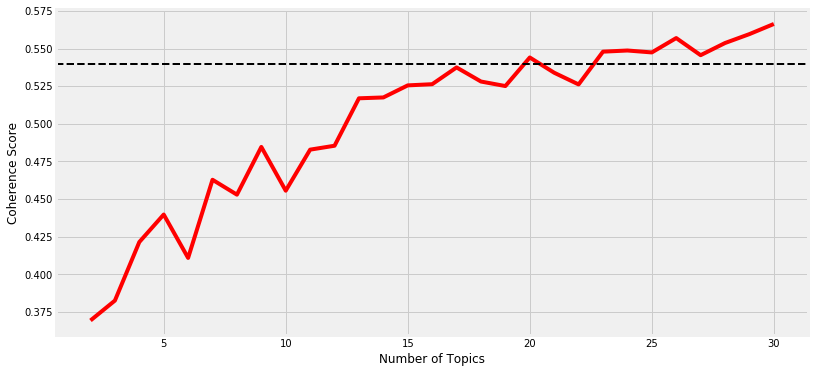

In [27]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c="r")
plt.axhline(y=0.540, c="k", linestyle="--", linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

### SELECTING LDA MODEL BASED ON COHERENCE

In [28]:
TOPICS = 25

load_lda_model = gensim.models.wrappers.LdaMallet.load('models/mallet/model_'+str(TOPICS)+'.gensim')

### EVALUATING TOPICS

In [29]:
topics = [[(term, round(wt, 3))
               for term, wt in load_lda_model.show_topic(n, topn=20)]
                   for n in range(0, load_lda_model.num_topics)]

pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, load_lda_model.num_topics+1)]
                         )
topics_df

,Terms per Topic
Topic1,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day"
Topic2,"official, email, investigation, report, clinton, information, russian, fbi, intelligence, russia, campaign, comey, document, committee, evidence, government, source, time, agency, hillary_clinton"
Topic3,"military, isi, attack, syria, force, war, group, government, official, killed, islamic_state, american, syrian, iraq, people, soldier, city, civilian, fighting, army"
Topic4,"law, state, court, decision, rule, federal, case, order, supreme_court, legal, public, government, policy, issue, judge, abortion, ban, justice, statement, action"
Topic5,"water, area, people, fire, flight, plane, cnn, home, official, land, airport, state, day, passenger, storm, air, island, road, part, ship"
Topic6,"country, china, united_state, government, russia, iran, leader, north_korea, official, international, deal, russian, israel, world, putin, power, president, military, nation, japan"
Topic7,"trump, president, obama, white_house, donald_trump, administration, day, american, washington, meeting, office, policy, president_barack, national_security, presidency, friday, issue, election, told, statement"
Topic8,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union"
Topic9,"company, facebook, car, technology, user, apple, online, google, product, internet, service, employee, twitter, customer, store, site, model, brand, time, tesla"
Topic10,"million, company, money, year, business, billion, market, chinese, price, bank, financial, pay, fund, deal, percent, cost, investor, firm, paid, sale"


### INTERPRETING RESULTS

In [ ]:
tm_results = load_lda_model[bow_corpus]

corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                     for topics in tm_results]
corpus_topics[:5]

In [ ]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(pre_papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Title'] = pre_titles
corpus_topic_df['Paper'] = pre_papers

### DISTRIBUTION OF TOPICS

In [ ]:
pd.set_option('display.max_colwidth', 200)

topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': {
                                                    'Doc Count': np.size,
                                                    '% Total Docs': np.size }
                                              })
topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(pre_papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

### DOCUMENTS RELATED TO GIVEN TOPIC

In [ ]:
corpus_topic_df[corpus_topic_df['Dominant Topic'] == 13].sort_values(by='Contribution %', ascending=False)

### DOCUMENT'S WITH HIGHEST TOPIC CONSTRIBUTION

In [ ]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

### DOMINENT TOPICS IN SPECIFIC DOCUMENTS

In [ ]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document']
                 .isin([681, 9, 392, 1622, 17,
                        906, 996, 503, 13, 733])])

### RELEVANT DOCUMENTS PER TOPIC BASED ON CONTRIBUTION

In [ ]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set:
                                            (topic_set.sort_values(by=['Contribution %'],
                                                   ascending=False).iloc[0]))

### VISUALIZING MODEL TOPICS WITH pyLDAvis

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

The size of the bubble measures the importance of the topics, relative to the data. 

In [ ]:
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(load_lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)